In [1733]:
print('Hare Krishna')

Hare Krishna


In [1734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 1 : Problem Statement

Developing an advanced machine learning model for the early detection of heart disease (0 = no disease, 1 = disease) by leveraging patient demographics and clinical features. The project, part of the Google Solution Challenge, aims to utilize parameters such as age, chest pain type, and cholesterol levels to predict the likelihood of heart disease. Employing a diverse set of machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest, Deep Neural Network, Linear Discriminant Analysis (LDA), and AdaBoost, the objective is to explore various parameter configurations for each algorithm. The ultimate goal is to identify the optimal model that achieves the highest accuracy, facilitating proactive healthcare measures for individuals at risk of heart disease. This project aligns with the Google Solution Challenge's mission of addressing real-world problems through innovative and effective technological solutions.

## Step 2: Data Gathering

In [1735]:
heart_df = pd.read_csv('/Users/jaydaksharora/Downloads/Heart_Dataset (2).csv')
df=heart_df

In [1797]:
heart_df1 = pd.read_csv('/Users/jaydaksharora/Downloads/Heart_Dataset (2).csv')
heart_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Step 3 : EDA(Exploratory Data Analysis)

In [1736]:
heart_df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1737]:
heart_df['target'] = heart_df['target'].astype(int)

<Axes: xlabel='age', ylabel='Density'>

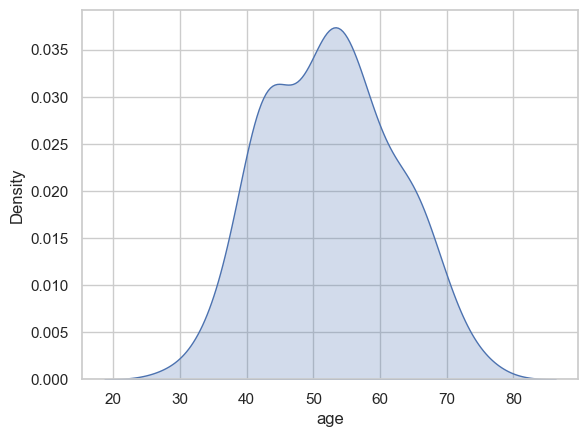

In [1738]:
## analysing variation in heart disease with respect ot age
df_target1=heart_df[heart_df['target']==1]
sns.kdeplot(data=df_target1,x='age',fill=True)

In [1739]:
#Separating features into continuous and categorical
categorical= [feature for feature in heart_df.columns if len(heart_df[feature].unique())<=5]
continuous= [feature for feature in heart_df.columns if len(heart_df[feature].unique())>5]
print("categorical variables are: ", categorical)
print("Continous variables are: ",continuous)

categorical variables are:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continous variables are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Analysing if age plays a specific role in contraction of heart disease

In [1740]:
df_target1=heart_df[heart_df["target"]==1]
df_target0=heart_df[heart_df["target"]==0]

In [1741]:
# Performing T-test since, one is categorical and another is continuous.
from scipy.stats import ttest_ind
age_no_disease = df_target0['age']
age_disease = df_target1['age']

# Performing independent two-sample t-test
t_statistic, p_value = ttest_ind(age_no_disease, age_disease, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Age and target are correlated.")
else:
    print("Age and target are not correlated.")


T-Statistic: 4.079669145481814
P-Value: 5.781030372508417e-05
Age and target are correlated.


<Axes: xlabel='age_group', ylabel='count'>

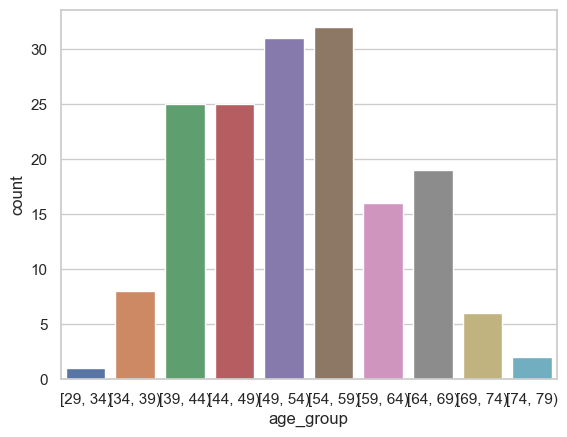

In [1742]:
# Dividing ages into age groups for better analysis
labels = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
bins=[29,34,39,44,49,54,59,64,69,74,79]
df_target1['age_group']=pd.cut(heart_df['age'],bins=bins,right=False)
heart_df['age_group']=pd.cut(heart_df['age'],bins=bins,right=False)
sns.countplot(data=df_target1,x='age_group',fill=True)

## Observation: In general, ages between 39 to 59 are most prone to heart diseases

In [1743]:
# Checking if Sex and target have a relation
contingency_table = pd.crosstab(heart_df['sex'], heart_df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared value:", chi2)
print("P-value:", p)

alpha = 0.05
if p < alpha:
    print("There is a significant association between sex and disease.")
else:
    print("There is no significant association between sex and disease.")

Chi-squared value: 22.717227046576355
P-value: 1.8767776216941503e-06
There is a significant association between sex and disease.


In [1744]:
male=heart_df[heart_df['sex']==1]
female=heart_df[heart_df['sex']==0]

<Axes: xlabel='age_group', ylabel='count'>

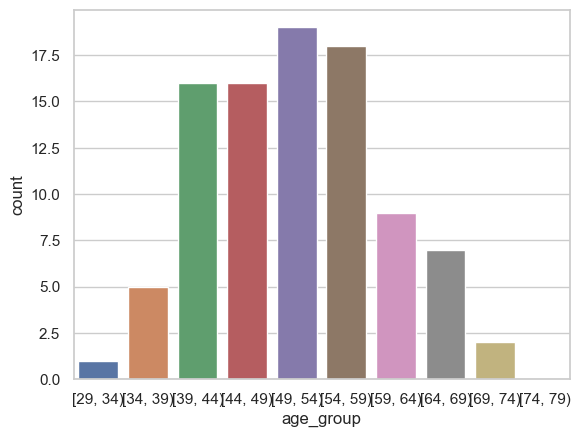

In [1745]:
sns.countplot(data=male[male['target']==1],x='age_group')

## Observation: Based on the above graph, it is clearly visible that men with ages 39 to 59 are most prone to heart diseases.

<Axes: xlabel='age_group', ylabel='count'>

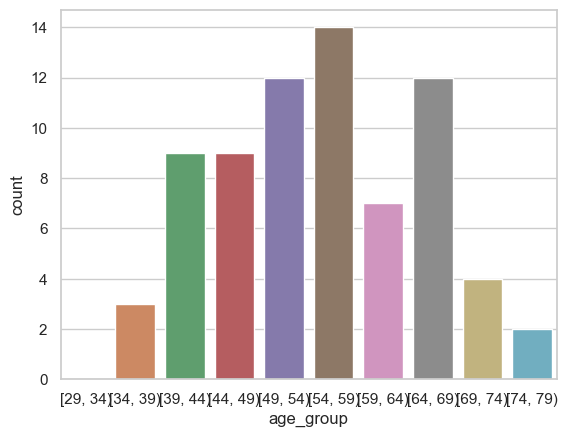

In [1746]:
sns.countplot(data=female[female['target']==1],x='age_group')

## Observation: Based on above graph, it is clearly visible that women with ages 39 to 69 are most prone to heart diseases.

## Resting electrocardiography results (Restecg) and disease

In [1747]:
contingency_table = pd.crosstab(heart_df['restecg'], heart_df['target'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared value:", chi2)
print("P-value:", p)
alpha = 0.05
if p < alpha:
    print("There is a significant association between restecg and heart disease.")
else:
    print("There is no significant association between restecg and heart disease.")

Chi-squared value: 10.023091785081
P-value: 0.006660598773498031
There is a significant association between restecg and heart disease.


In [1748]:
contingency_table = pd.crosstab(heart_df['restecg'], heart_df['age_group'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared value:", chi2)
print("P-value:", p)
alpha = 0.05
if p < alpha:
    print("There is a significant assocation between restecg and age.")
else:
    print("There is no significant association between restecg and age.")

Chi-squared value: 44.869928154739895
P-value: 0.00043272047097396294
There is a significant assocation between restecg and age.


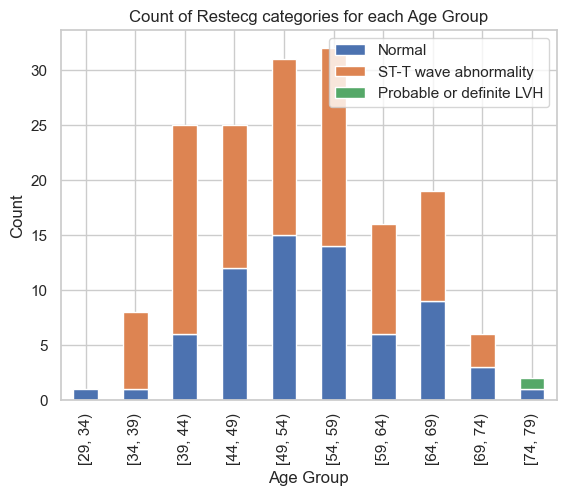

In [1749]:
grouped_data = df_target1.groupby(['age_group', 'restecg']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Restecg categories for each Age Group')
legend_labels = {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Probable or definite LVH'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in range(len(legend_labels))], legend_labels.values())
plt.show()

## Observation: It is evident that the likelihood of developing heart disease is higher for ST-T wave abnormality, showing an increasing trend with age.

## Analysing relation between old peak and heart disease

In [1754]:
# Performing T-test since, one is categorical and another is continuous.
from scipy.stats import ttest_ind
a = df_target0['oldpeak']
b = df_target1['oldpeak']

# Performing independent two-sample t-test
t_statistic, p_value = ttest_ind(a, b, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("oldpeak and target are correlated.")
else:
    print("oldpeak and target are not correlated.")

T-Statistic: 7.938556202707923
P-Value: 1.1096104777240863e-13
oldpeak and target are correlated.


In [1755]:
from scipy.stats import pearsonr
age = heart_df['age']
thalach = heart_df['oldpeak']
correlation_coefficient, p_value = pearsonr(age, thalach)
print("Pearson Correlation Coefficient:")
print(f"Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant linear relationship between age and oldpeak.")
else:
    print("There is no significant linear relationship between age and oldpeak.")


Pearson Correlation Coefficient:
Coefficient: 0.21001256735867332
P-value: 0.00023168502798975193
There is a significant linear relationship between age and oldpeak.


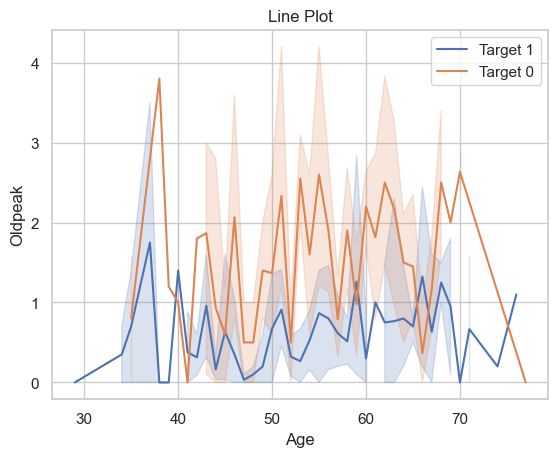

In [1756]:
heart_df_sorted = heart_df.sort_values(by='age')
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.lineplot(data=heart_df_sorted[heart_df_sorted['target'] == 1], x='age', y='oldpeak', ax=ax, label='Target 1')
sns.lineplot(data=heart_df_sorted[heart_df_sorted['target'] == 0], x='age', y='oldpeak', ax=ax, label='Target 0')
plt.title('Line Plot')
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.legend()
plt.show()


<Axes: xlabel='age_group', ylabel='count'>

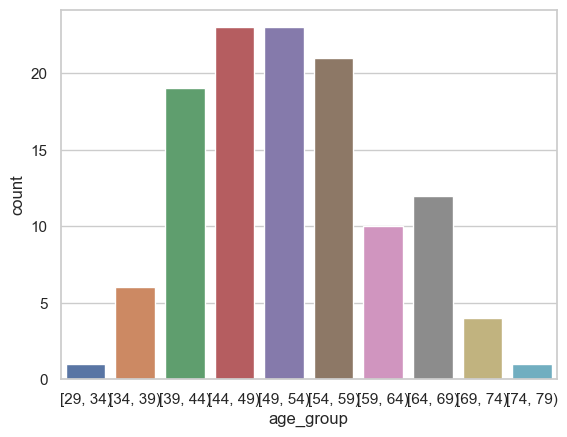

In [1757]:
sns.countplot(data=heart_df[(heart_df['oldpeak']<1) & (heart_df['target']==1)],x='age_group')

In [1758]:
percentage=(heart_df[(heart_df['oldpeak'] < 1) & (heart_df['target'] == 1)].count() / heart_df[heart_df['oldpeak'] < 1].count())
percentage[0]

0.7228915662650602

## Observations: Oldpeak below 1.0 is dangerous. 73% of patients with oldpeak below 1.0 have heart disease. Age-groups between 39-59 have higher chance of contraction of disease due to low oldpeak.

## Analysing relation between ca and heart disease

In [1759]:
contingency_table = pd.crosstab(heart_df['ca'], heart_df['target'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of an association between 'ca' and 'target'.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of an association between 'ca' and 'target'.")

Chi-square statistic: 74.3666
P-value: 0.0000
Reject the null hypothesis. There is evidence of an association between 'ca' and 'target'.


In [1760]:
# Applying Anova because ca is a three category variable and age is a continuous variable
from scipy.stats import f_oneway
result = f_oneway(heart_df['age'][heart_df['ca'] == 0],
                 heart_df['age'][heart_df['ca'] == 1],
                 heart_df['age'][heart_df['ca'] == 2],
                 heart_df['age'][heart_df['ca'] == 3])

print(result)

F_onewayResult(statistic=17.378372258954855, pvalue=2.051903777079083e-10)


In [1761]:
# since, f_oneway is close to zero, there is strong relation between them.

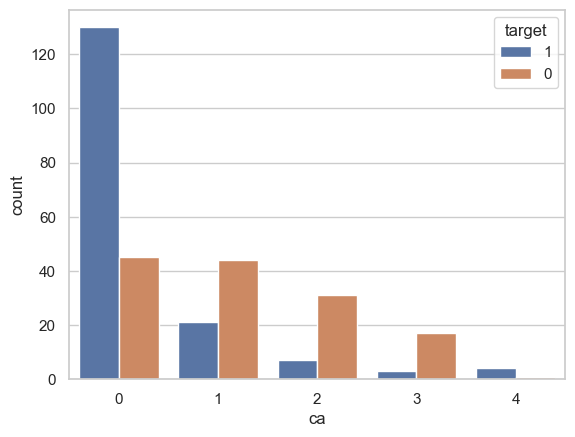

In [1762]:
heart_df['target'] = heart_df['target'].astype(str)
sns.countplot(data=heart_df, x='ca', hue='target')
plt.show()
heart_df['target'] = heart_df['target'].astype(int)

## Observation: 
1) number of major vessels = 0 has next most chance of heart disease.
2) number of major vessels = 1 has moderate chances of heart disease.
3) number of major vessels = 2 has less chance of heart disease.
4) number of major vessels = 3 has least chances of heart disease.
Lower the number of major vessels, higher the chances of disease.

## Step 4 : Feature Engineering

In [1763]:
heart_df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


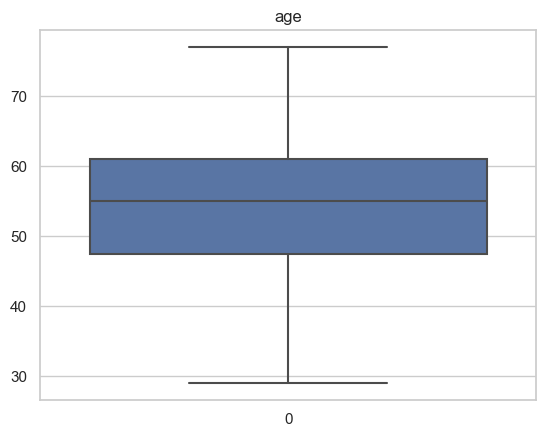

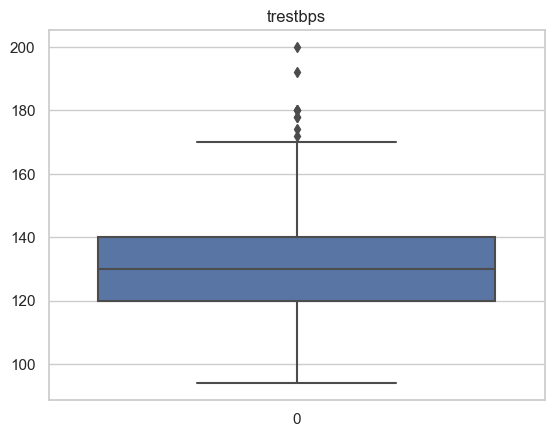

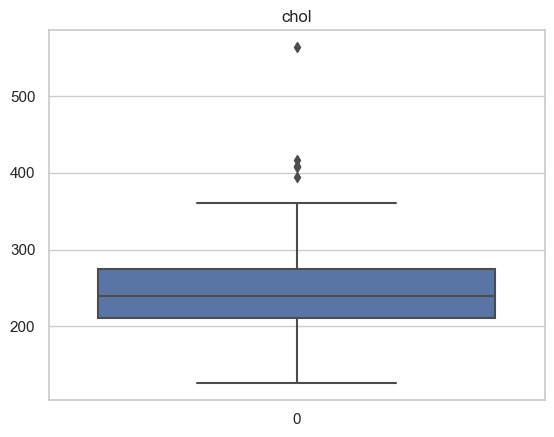

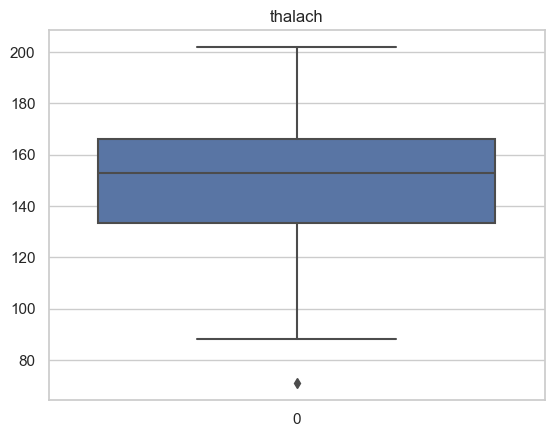

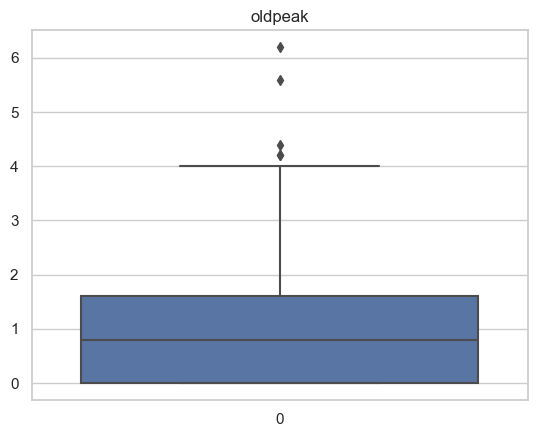

In [1764]:
print(continuous)
for feature in continuous:
    sns.boxplot(heart_df[feature])
    plt.title(feature)
    plt.show()

###  Finding and Replacing outliers with operatile and lower tail

In [1765]:
# To replace outliers
def Finding_outliar1(heart_df,columns):
    for column in columns:
            q1 = heart_df[column].quantile(0.25)
            q3 = heart_df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            
            heart_df[column] = heart_df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = continuous

Finding_outliar1(heart_df,columns)

## Scaling 

### Method:- Normalization

In [1766]:
heart_df.drop(['age_group'],axis=1,inplace=True)

In [1767]:
for feature in categorical:
    heart_df = pd.get_dummies(heart_df, columns=[feature], prefix=feature, drop_first=True, dtype=int)

In [1768]:
normal = MinMaxScaler() 
normal_Sc = normal.fit_transform(heart_df.iloc[:,:-1])
df_Normal = pd.DataFrame(normal_Sc,columns=heart_df.iloc[:,:-1].columns)
heart_df.iloc[:,:-1]=df_Normal
heart_df

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,0.708333,0.671053,0.438974,0.556503,0.575,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.166667,0.473684,0.508718,0.872068,0.875,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.250000,0.473684,0.320000,0.744136,0.350,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.562500,0.342105,0.451282,0.795309,0.200,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.583333,0.342105,0.935385,0.667377,0.150,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.605263,0.471795,0.326226,0.050,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
299,0.333333,0.210526,0.566154,0.402985,0.300,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
300,0.812500,0.657895,0.274872,0.479744,0.850,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
301,0.583333,0.473684,0.020513,0.257996,0.300,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## Step 5 : Feature Selection

## Checking Multicolinearity

In [1769]:
df1=heart_df

In [1770]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif = []
    for i in range(data_frame.shape[1]):
        vif_cal = variance_inflation_factor(data_frame.values, i)
        vif.append((data_frame.columns[i], vif_cal))
    return vif

def drop_max_vif(data_frame, dropped_columns=None):
    if dropped_columns is None:
        dropped_columns = []
    
    vif = calculate_vif(data_frame)
    max_vif_column, max_vif_value = max(vif, key=lambda x: x[1])
    if max_vif_value > 5:
        print(f"Dropping column '{max_vif_column}' with VIF: {max_vif_value}")
        # Drop the column and reset the index
        data_frame = data_frame.drop(columns=[max_vif_column]).reset_index(drop=True)
        # Recursively call the function
        return drop_max_vif(data_frame, dropped_columns + [max_vif_column])
    else:
        print("VIF values are now between 1 and 5.")
        return data_frame, dropped_columns
df1_dropped, dropped_columns = drop_max_vif(df1)
vif_after_dropping = calculate_vif(df1_dropped)
print("VIF values after dropping columns:")
for col, vif_value in vif_after_dropping:
    print(f"{col}: {vif_value}")
print("List of dropped columns:", dropped_columns)
df1=df1_dropped

Dropping column 'thal_2' with VIF: 29.983533964095063
Dropping column 'thalach' with VIF: 12.054305585359666
Dropping column 'age' with VIF: 11.03489173335519
Dropping column 'slope_2' with VIF: 7.277067044629949
Dropping column 'chol' with VIF: 6.108069572476144
VIF values are now between 1 and 5.
VIF values after dropping columns:
trestbps: 4.889648394976107
oldpeak: 2.7416961555924866
sex_1: 3.425163827059424
cp_1: 1.7535064534290792
cp_2: 2.2988524557418772
cp_3: 1.3826695192616616
fbs_1: 1.2848470659284954
restecg_1: 2.07504587137785
restecg_2: 1.0913055577432627
exang_1: 2.035975467579779
slope_1: 2.1569232260502713
ca_1: 1.4738076682040528
ca_2: 1.4023736389080732
ca_3: 1.2563947312879482
ca_4: 1.0667958104470696
thal_1: 1.3088493366690848
thal_3: 2.658965991001779
target_1: 3.3441244518950084
List of dropped columns: ['thal_2', 'thalach', 'age', 'slope_2', 'chol']


## Step 6: Train test split

In [1771]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [1772]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Step 7 : model training 

### 1) Logistic Regression algorithm 

In [1773]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold

class_labels = [0, 1]

class_weights = compute_class_weight(class_weight='balanced',classes=class_labels,y=ytrain)

weights_dict = {class_labels[i]: weight for i, weight in enumerate(class_weights)}

logreg = LogisticRegression(max_iter=1000, class_weight=weights_dict, random_state=42)

param_grid = {'penalty': ['l2','l1','elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='f1', verbose=2, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
ytest_pred=grid_search.predict(xtest)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameters:  {'C': 100, 'penalty': 'l2'}
Best Score:  0.8581256648842857


## Testing

In [1774]:
conf_matrix = confusion_matrix(ytest,ytest_pred)
print(conf_matrix)
print(50*"_")
print(50*"*")

class_rep = classification_report(ytest,ytest_pred)
print (class_rep)
print(50*"_")
print(50*"*")

[[25  4]
 [ 4 28]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

__________________________________________________
**************************************************


### 2) Random Forest algorithm

In [1775]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 120, 140],
    'criterion': ['gini'],
    'max_depth': [None, 10, 15, 20],
    'max_features': ['sqrt', 0.5, 0.7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

grid_search_rf = GridSearchCV(
    rf_classifier,
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    verbose=0,
    n_jobs=-1
)

grid_search_rf.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Accuracy: ", grid_search_rf.best_score_)


Best Parameters:  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}
Best Accuracy:  0.8261054421768707


[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_sa

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_sampl

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_sp

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_sample

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_sa

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_sampl

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criteri

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_s

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samp

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samp

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=g

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, crit

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criteri

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini,

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_de

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gi

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, m

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, m

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gin

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, m

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_de

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, 

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_de

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_d

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_de

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gin

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=10,

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, m

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_e

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120;

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10,

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=140;

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120;

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimator

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=5, n_estimators=140;

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estim


[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_

[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120;

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samp

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_sample


[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.5, min_samples_le

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, mi

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, mi

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_sam

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samp

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samp

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=1, min_s

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_sam

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min_samp

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_sam

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samp

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=15, max_features=0.7, min_samples_leaf=4, min

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, 

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsampl

[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=4, min_sam

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, 

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, c

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, crit

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=g

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.0s[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini,

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=g

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=g

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, 

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=2, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=0.7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gi

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criter

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, 


[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, 

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.7, min_samples_leaf=4, min_samples_spl

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini,

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, 

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_spli

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, 

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=140; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_est

Best Parameters:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 120}
Best Accuracy:  0.7932823129251702


In [1776]:
y1test_pred_forest = grid_search_rf.predict(xtest)

In [1777]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.819672131147541
classification_report =               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

confusion_matrix = [[26  3]
 [ 8 24]]


## 3) Decision Tree Algorithm

In [1778]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],  # Experiment with different values
    'class_weight': ['balanced', None]
}

grid_search_dt = GridSearchCV(
    dt_classifier,
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    verbose=0,
    n_jobs=-1
)

grid_search_dt.fit(xtrain, ytrain)

print("Best Parameters: ", grid_search_dt.best_params_)
print("Best Accuracy: ", grid_search_dt.best_score_)

y_pred = grid_search_dt.best_estimator_.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))


Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.7893707482993196
Decision Tree Accuracy: 75.41%


In [1779]:
y1test_pred_forest = grid_search_dt.predict(xtest)

In [1780]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.7540983606557377
classification_report =               precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.87      0.62      0.73        32

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

confusion_matrix = [[26  3]
 [12 20]]


## 4) K nearest Neighbours

In [1781]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [1782]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': range(1, 20, 2)}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5,verbose=0)
grid_search.fit(xtrain,ytrain)

best_k = grid_search.best_params_['n_neighbors']

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

best_knn_classifier.fit(xtrain,ytrain)

y1test_pred_forest = best_knn_classifier.predict(xtest)

accuracy = accuracy_score(ytest, y1test_pred_forest)
print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy}')


Best k: 7
Accuracy: 0.8360655737704918


In [1783]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.8360655737704918
classification_report =               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

confusion_matrix = [[26  3]
 [ 7 25]]


## 5) Adaboost

In [1784]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

base_model = grid_search_dt.best_estimator_ 

adaboost_classifier = AdaBoostClassifier(base_model, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create GridSearchCV object
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(xtrain,ytrain)

# Retrieve the best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Calculate and print training accuracy
y_pred_train = best_model.predict(xtrain)
train_accuracy = accuracy_score(ytrain, y_pred_train)
print("Training Accuracy with Best Model:", train_accuracy)

# Calculate and print testing accuracy
y_pred_test = best_model.predict(xtest)
test_accuracy = accuracy_score(ytest, y_pred_test)
print("Test Accuracy with Best Model:", test_accuracy)

print("\nBest Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_accuracy)


Training Accuracy with Best Model: 1.0
Test Accuracy with Best Model: 0.819672131147541

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.8096938775510205


## 6) Naive Bayes

In [1785]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(xtrain,ytrain)

y1test_pred_forest = naive_bayes_classifier.predict(xtest)

test_accuracy_naive_bayes = accuracy_score(y_test, y_pred_test_naive_bayes)
print("Test Accuracy with Gaussian Naive Bayes Model:", test_accuracy_naive_bayes)


Test Accuracy with Gaussian Naive Bayes Model: 0.795


## 7) Linear Discriminant analysis

In [1786]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')  # Updated with 'lsqr' solver

param_grid = {'n_components': [None, 1, 2]}

grid_search = GridSearchCV(lda, param_grid, cv=10, scoring='accuracy')

grid_search.fit(xtrain,ytrain)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred_train = best_model.transform(xtrain) 
y_pred_train = best_model.predict(xtrain)  

train_accuracy = accuracy_score(ytrain, y_pred_train)
print("Training Accuracy with Best Model:", train_accuracy)

y_pred_test = best_model.transform(xtest)
y_pred_test = best_model.predict(xtest) 

test_accuracy = accuracy_score(ytest, y_pred_test)
print("Test Accuracy with Best Model:", test_accuracy)

print("\nBest Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_accuracy)

Training Accuracy with Best Model: 0.859504132231405
Test Accuracy with Best Model: 0.8688524590163934

Best Parameters: {'n_components': None}
Best Cross-Validated Accuracy: 0.8305000000000001


## 8) Deep Neural Networks

In [1787]:
def initialize_params(n_x, n_h, n_y):
    params={}
    w1 = np.random.randn(n_h, n_x) * 0.01
    w2 = np.random.randn(n_y, n_h) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    b2 = np.zeros(shape=(n_y, 1))
    params = {"w1": w1,
              "w2": w2,
              "b1": b1,
              "b2": b2}
    return params
def initialize_params_deep(layer_dims):
    params={}
    L=len(layer_dims)
    for l in range (1,L):
        params['w'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.001
        params['b'+str(l)]=np.zeros(shape=(layer_dims[l],1))
    return params
def sigmoid(z):
    return 1 / (1 + np.exp(-z)), z
def relu(z):
    return np.maximum(0, z),z
def linear_forward(a, w, b):
    z = np.dot(w, a) + b
    assert(z.shape == (w.shape[0], a.shape[1]))
    return z, a, w, b
def linear_activation_forward(a_prev, w, b, activation):
    z, a, w, b = linear_forward(a_prev, w, b)
    if activation == 'sigmoid':
        a, z = sigmoid(z)
    elif activation == "relu":
        a, z = relu(z)
    assert(a.shape == (w.shape[0], a_prev.shape[1]))
    return z, a, w, b
def l_model_forward(x, params, layer_dims):
    a = x
    L = len(params) // 2
    a_t=[]
    w_t=[]
    z_t=[]
    b_t=[]
    for l in range(1, L):
        a_prev = a
        z,a,w,b = linear_activation_forward(a_prev, params['w' + str(l)], params['b' + str(l)], activation='relu')
        a = np.array(a).reshape(layer_dims[l], x.shape[1])
        z = np.array(z).reshape(layer_dims[l], x.shape[1])
        w = np.array(w).reshape(layer_dims[l], layer_dims[l-1])
        b = np.array(b).reshape(layer_dims[l], 1)
        a_t.append(a)
        w_t.append(w)
        z_t.append(z)
        b_t.append(b)

    zL,aL,wL,bL = linear_activation_forward(a, params['w' + str(L)], params['b' + str(L)], activation='sigmoid')

    aL = np.array(aL).reshape(layer_dims[L], x.shape[1])
    zL = np.array(zL).reshape(layer_dims[L], x.shape[1])
    wL = np.array(wL).reshape(layer_dims[L], layer_dims[L-1])
    bL = np.array(bL).reshape(layer_dims[L], 1)
    a_t.append(aL)
    w_t.append(wL)
    z_t.append(zL)
    b_t.append(bL)
    assert(aL.shape == (1, x.shape[1]))

    return aL, a_t, z_t, w_t, b_t, zL, wL, bL
def loss(ytr,aL,m):
    epsilon = 0
    q = np.multiply(ytr, np.log(aL + epsilon))
    p = np.multiply(1 - ytr, np.log(1 - aL + epsilon))
    c=-(1/320)*(q+p)
    c=np.squeeze(c)
    c=np.sum(c)
    return c
def back_propagation(ytr, aL, layer_dims, xtr, z_t, a_t, w_t, b_t):
    grads = {}
    a0 = xtr
    L = len(layer_dims)
    z = z_t[L-2]
    daL=-(np.divide(ytr,aL)-((1-ytr)/1-aL))
    dzL=-(np.multiply(daL,(np.exp(-z)/(1+np.exp(-z))**2)))
    grads['dw' + str(L-1)] = np.dot(dzL, a_t[L-2].T)
    dbL = np.sum(dzL, axis=1, keepdims=True) / xtr.shape[1]
    grads['dz' + str(L-1)] = dzL
    grads['db' + str(L-1)] = dbL
    
    for l in reversed(range(1, len(layer_dims) - 1)):
        grads['da' + str(l)] = np.dot(w_t[l].T, grads['dz' + str(l+1)])
        grads['dz' + str(l)] = np.multiply(grads['da' + str(l)], (z_t[l-1] > 0).astype(int))
        
        if l == 1:
            grads['dw' + str(l)] = np.dot(grads['dz' + str(l)], a0.T)
            grads['db' + str(l)] = np.sum(grads['dz' + str(l)], axis=1, keepdims=True) / xtr.shape[1]
        else:
            grads['dw' + str(l)] = np.dot(grads['dz' + str(l)], a_t[l-2].T)
            grads['db' + str(l)] = np.sum(grads['dz' + str(l)], axis=1, keepdims=True) / xtr.shape[1]
            
    return grads, daL

def predict(x, params, layer_dims):
    L = len(layer_dims) - 1
    a = x
    for l in range(1, L):
        a_prev = a
        z, a, w, b = linear_activation_forward(a_prev, params['w' + str(l)], params['b' + str(l)], activation='relu')
    zL, aL, wL, bL = linear_activation_forward(a, params['w' + str(L)], params['b' + str(L)], activation='sigmoid')
    aL = np.array(aL).reshape(layer_dims[L], x.shape[1])
    zL = np.array(zL).reshape(layer_dims[L], x.shape[1])
    wL = np.array(wL).reshape(layer_dims[L], layer_dims[L-1])
    bL = np.array(bL).reshape(layer_dims[L], 1)
    assert(aL.shape == (1, x.shape[1]))
    return aL


def update_params(params,grads,learning_rate):
    L=len(params)//2
    print
    for l in range(L):
        params["w"+str(l+1)]=params["w"+str(l+1)]-learning_rate*grads["dw"+str(l+1)]
        params["b"+str(l+1)]=params["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
def model(xtr, ytr, layer_dims, cycle, xte, yte):
    m = xtr.shape[1]
    xtr = xtr.T
    q=ytr
    ytr = ytr.T
    print(ytr.shape)
    ytr = ytr.reshape(1, q.shape[0])
    params=initialize_params(layer_dims[0],layer_dims[1],layer_dims[2])
    params = initialize_params_deep(layer_dims)
    for i in range(cycle):
        aL, a_t, z_t, w_t, b_t, zL, wL, bL = l_model_forward(xtr, params, layer_dims)
        Loss = loss(ytr, aL, m)
        if Loss < 0.5:
            return Loss, params
        if i == cycle - 1:
            return Loss, params
        grads, daL = back_propagation(ytr, aL, layer_dims, xtr, a_t, z_t, w_t, b_t)
        update_params(params,grads,0.001)

In [1788]:
j=[xtr.shape[1],3,4,1]
params=initialize_params(xtr.shape[0],j[-2],ytr.shape[0])
params=initialize_params_deep(j)
Loss,params=model(xtr,ytr,j,500,xte,yte)
Loss

(242,)


0.5311590883617914

In [1789]:
aL=predict(xte.T,params,j)
aL=np.where(aL>0.5,1,0)
accuracy_score(yte,aL.T)

0.47540983606557374

In [1790]:
def predictable_x(df, trestbps, oldpeak, sex, cp, fbs, restecg, exang, slope, ca, thal):
    if fbs > 120:
        fbs = 1
    else:
        fbs = 0
    if cp == 'typical angina':
        cp = 0
    elif cp == 'atypical angina':
        cp = 1
    elif cp == 'non anginal':
        cp = 2
    else:
        cp = 3
    if restecg == 'normal':
        restecg = 0
    elif restecg == 'ST-T wave abnormality':
        restecg = 1
    elif restecg == 'left ventricular hypertrophy':
        restecg = 2
    if exang == 'yes':
        exang = 1
    else:
        exang = 0
    if slope == 'upsloping':
        slope = 0
    elif slope == 'downsloping':
        slope = 1
    else:
        slope = 2
    if thal == 'error':
        thal = 0
    elif thal == 'fixed defect':
        thal = 1
    elif thal == 'normal':
        thal = 2
    else:
        thal = 3

    # Create a DataFrame with the input features
    xpr = pd.DataFrame({
        'age': [0],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [0],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [0],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal],
        'target': [1]
    })


    df = pd.concat([df, xpr], ignore_index=True)
    for feature in df.columns:
        if feature in categorical:
            df = pd.get_dummies(df, columns=[feature], prefix=feature, drop_first=True, dtype=int)
    df.iloc[:,:-1] = normal.transform(df.iloc[:,:-1])
    df.drop(dropped_columns, axis=1, inplace=True)
    return df

In [1791]:
xpr=predictable_x(df,145,0.5,1,'asymptomatic',200,'normal','no','unsloping',0,'fixed defect')

In [1792]:
yp = best_model.predict(xpr.iloc[-1, :-1].values.reshape(1, -1))
if(yp==1):
    print("YES, YOU HAVE HEART DISEASE")
else:
    print("NO, YOU DONT HAVE HEART DISEASE")

YES, YOU HAVE HEART DISEASE


In [1793]:
xpr=predictable_x(df,145,2.5,1,'asymptomatic',200,'normal','no','unsloping',0,'fixed defect')

In [1794]:
yp = best_model.predict(xpr.iloc[-1, :-1].values.reshape(1, -1))
if(yp==1):
    print("YES, YOU HAVE HEART DISEASE")
else:
    print("NO, YOU DONT HAVE HEART DISEASE")

NO, YOU DONT HAVE HEART DISEASE
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0